In [ ]:
!bunzip2 /content/Leaves.tar.bz2

In [ ]:
!tar -xvf  '/content/Leaves.tar'

Leaves/
Leaves/3529.jpg
Leaves/3563.jpg
Leaves/3411.jpg
Leaves/2339.jpg
Leaves/3571.jpg
Leaves/2515.jpg
Leaves/1061.jpg
Leaves/1389.jpg
Leaves/2123.jpg
Leaves/2423.jpg
Leaves/2154.jpg
Leaves/2176.jpg
Leaves/1360.jpg
Leaves/1070.jpg
Leaves/1441.jpg
Leaves/2234.jpg
Leaves/3421.jpg
Leaves/3337.jpg
Leaves/2500.jpg
Leaves/1595.jpg
Leaves/2557.jpg
Leaves/2470.jpg
Leaves/3353.jpg
Leaves/1122.jpg
Leaves/1260.jpg
Leaves/2675.jpg
Leaves/2190.jpg
Leaves/1049.jpg
Leaves/1028.jpg
Leaves/3167.jpg
Leaves/3345.jpg
Leaves/3151.jpg
Leaves/1436.jpg
Leaves/1439.jpg
Leaves/3315.jpg
Leaves/2411.jpg
Leaves/2172.jpg
Leaves/3091.jpg
Leaves/3184.jpg
Leaves/3501.jpg
Leaves/1309.jpg
Leaves/3146.jpg
Leaves/1481.jpg
Leaves/1486.jpg
Leaves/3616.jpg
Leaves/1544.jpg
Leaves/1151.jpg
Leaves/1321.jpg
Leaves/2247.jpg
Leaves/1279.jpg
Leaves/2106.jpg
Leaves/1231.jpg
Leaves/1400.jpg
Leaves/1549.jpg
Leaves/2340.jpg
Leaves/2619.jpg
Leaves/3142.jpg
Leaves/2452.jpg
Leaves/2406.jpg
Leaves/1608.jpg
Leaves/1531.jpg
Leaves/1406.jpg


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Data Preprocessing

In [ ]:
## Data Preprocessing
def preprocess_data(data_path, image_size):
    X = []  # List to store the features

    for image_file in os.listdir(data_path):
        image_path = os.path.join(data_path, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        image = cv2.resize(image, image_size)  # Resize to a fixed size (128x128)

        # Flatten the 2D image into a 1D array to create a feature vector
        #features = image.flatten()

        X.append(image)

    # Convert the lists to numpy arrays
    X = np.array(X)

    return X


In [ ]:
# Define the path to the Flavia dataset and the desired image size
data_path = '/content/Leaves'
image_size = (128, 128)

# Preprocess the data
X = preprocess_data(data_path, image_size)

In [ ]:
br_points = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,
               1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,
               2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,
               3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]
label_list = []
for image_file in os.listdir(data_path):
    # Extract the numeric part of the image filename to get the class label
    class_label = int(image_file.split(".")[0])
    flag = 0
    i = 0
    for i in range(0,len(br_points),2):
        # Check if the class label falls within the defined range
        if((class_label >= br_points[i]) and (class_label <= br_points[i+1])):
            flag = 1
            break
    if(flag==1):
        # Calculate the target class label based on the pair index (i divided by 2)
        target = int((i/2))
        # Append the target class label to the label_list
        label_list.append(target)
# Convert the label_list to a NumPy array
y = np.array(label_list)
# Display the unique class labels assigned to the images based on their filenames' numeric parts
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


In [ ]:
# display shape of features
X = np.array(X)
print(X.shape)
# display shape of labels
y = np.array(y)
print(y.shape)

(1907, 128, 128)
(1907,)


In [ ]:
# Normalize pixel values to [0, 1]
X = X.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# CNN Model

In [ ]:
#Build the CNN model architecture
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

#Define input shape and number of classes
input_shape = (128, 128, 1)  #  grayscale images
num_classes = 32  # Number of classes in the Flavia dataset

#Build the CNN model
model = build_cnn_model(input_shape, num_classes)

#Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

# Training Model

In [ ]:
# Train the model
batch_size = 32
epochs = 50

history = model.fit(X_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/50
42/42 [==============================] - 6s 37ms/step - loss: 3.1100 - accuracy: 0.1574 - val_loss: 2.0102 - val_accuracy: 0.4790
Epoch 2/50
42/42 [==============================] - 1s 21ms/step - loss: 1.6049 - accuracy: 0.5472 - val_loss: 0.9398 - val_accuracy: 0.7587
Epoch 3/50
42/42 [==============================] - 1s 23ms/step - loss: 0.9076 - accuracy: 0.7421 - val_loss: 0.7385 - val_accuracy: 0.8182
Epoch 4/50
42/42 [==============================] - 1s 20ms/step - loss: 0.6791 - accuracy: 0.7916 - val_loss: 0.6199 - val_accuracy: 0.8217
Epoch 5/50
42/42 [==============================] - 1s 19ms/step - loss: 0.5306 - accuracy: 0.8418 - val_loss: 0.5512 - val_accuracy: 0.8706
Epoch 6/50
42/42 [==============================] - 1s 19ms/step - loss: 0.4110 - accuracy: 0.8801 - val_loss: 0.5461 - val_accuracy: 0.8671
Epoch 7/50
42/42 [==============================] - 1s 19ms/step - loss: 0.2977 - accuracy: 0.9018 - val_loss: 0.4719 - val_accuracy: 0.8776
Epoch 8/50
42

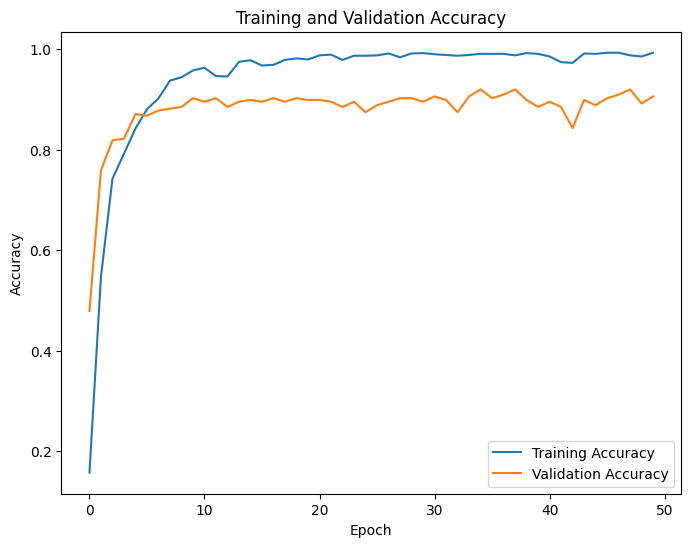

In [ ]:
# Retrieve training history from the 'history' variable obtained during model training
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Plot the curves
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

9/9 [==============================] - 0s 33ms/step


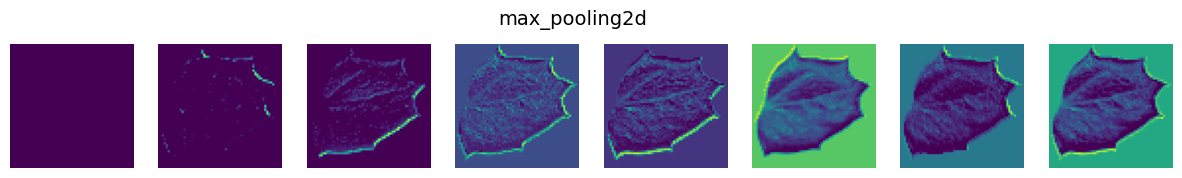

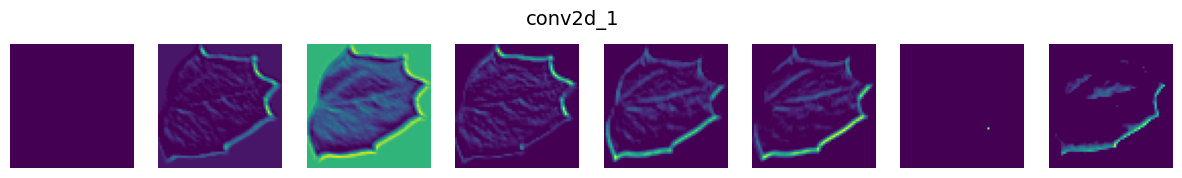

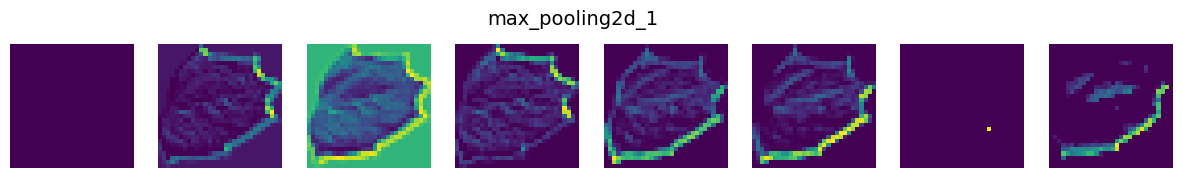

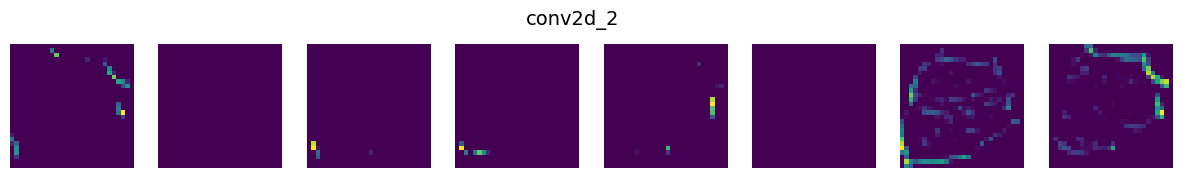

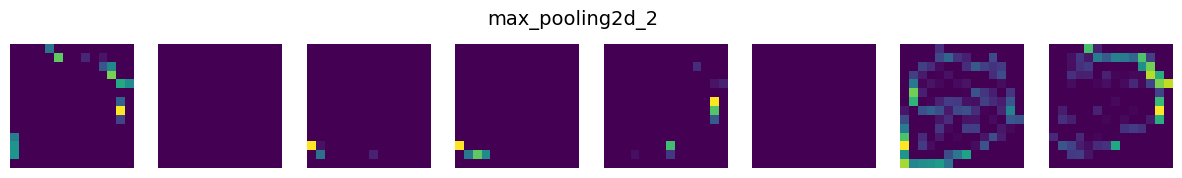

Activation of flatten has unsupported dimensions: (287, 25088)
Activation of dense has unsupported dimensions: (287, 512)


In [ ]:
# Analyze the results to visualize learned features, you can plot the activations of intermediate layers.
def visualize_activations(model, X_sample):
    layer_outputs = [layer.output for layer in model.layers[1:-2]]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(X_sample)

    for layer_name, activation in zip(model.layers[1:-2], activations):

        if activation.ndim == 4:
            n_features = min(8, activation.shape[-1])
            fig, axes = plt.subplots(1, n_features, figsize=(15, 2))
            fig.suptitle(layer_name.name, fontsize=14)
            for i in range(n_features):
                axes[i].imshow(activation[0, :, :, i], cmap='viridis')
                axes[i].axis('off')
            plt.show()
        elif activation.ndim == 3:
            plt.figure()
            plt.title(layer_name.name)
            for i in range(min(8, activation.shape[-1])):
                plt.subplot(1, 8, i + 1)
                plt.imshow(activation[:, :, i], cmap='viridis')
                plt.axis('off')
            plt.show()
        else:
            print(f"Activation of {layer_name.name} has unsupported dimensions: {activation.shape}")


visualize_activations(model, X_test)

# Evaluate Model

In [ ]:
#  Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    #conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1 Score: {:.2f}%".format(f1 * 100))
    #print(conf_matrix)

evaluate_model(model, X_test, y_test)

9/9 [==============================] - 0s 5ms/step
Accuracy: 92.33%
Precision: 93.14%
Recall: 92.33%
F1 Score: 92.35%


9/9 [==============================] - 0s 5ms/step


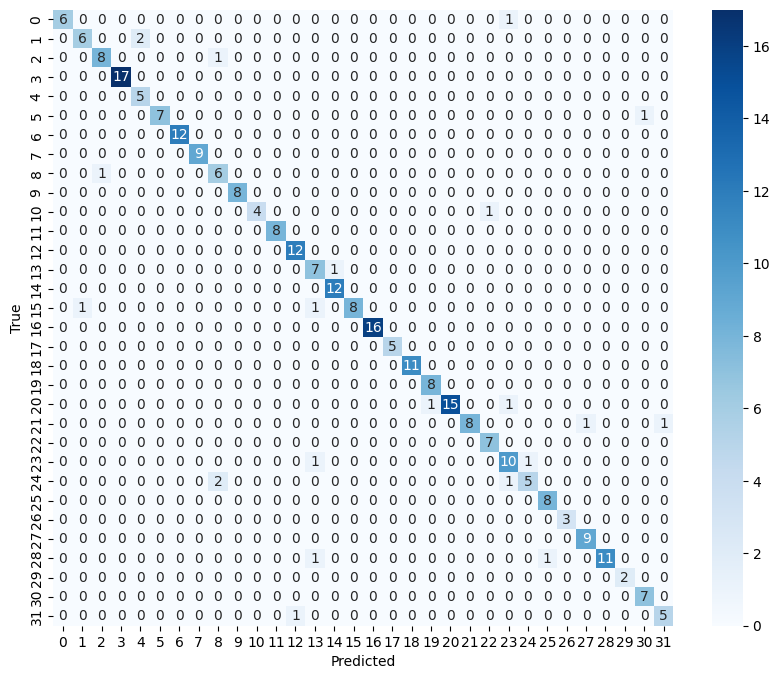

In [ ]:
# Plot confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
